In [20]:
import pandas as pd
import numpy as np
from sklearn import tree
from IPython.display import Image
import pydotplus

In [4]:
iris = pd.read_excel('Iris.xls')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
x = iris[['sepallength', 'sepalwidth','petallength', 'petalwidth']]
x.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
y = iris['iris']

In [52]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(x, y)

In [53]:
# Gini : Nếu continuos attributes, vừa continuos vừa classification --> Tính tốt hơn entropy 
# Entropy : Nếu hoàn toàn phân loại --> Gini tốt hơn
# Gini : minimize misclassification
# Entropy : exploratory analysis, a little slower to compute
# Max-depth : thực hiện vòng lặp, nếu cây quá cồng kềnh (càng sâu, càng khó diễn giải)
# ==> Chỉnh Max-depth cho cây dễ diễn giải hơn. VD : độ sâu là 9 --> cho dao động 6, 7, 8

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
model.score(x, y)

1.0

In [56]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns
                               )
print(dot_data)
dot_data

digraph Tree {
node [shape=box] ;
0 [label="petallength <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwidth <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petallength <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="petalwidth <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="petalwidth <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="sepallength <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;

'digraph Tree {\nnode [shape=box] ;\n0 [label="petallength <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petalwidth <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petallength <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="petalwidth <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="petalwidth <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="sepallength <= 6.95\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9 ;\n10 [label

In [57]:
with open("iris_1510.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f,
                             feature_names=x.columns)
    print("Đã xuất file")

Đã xuất file


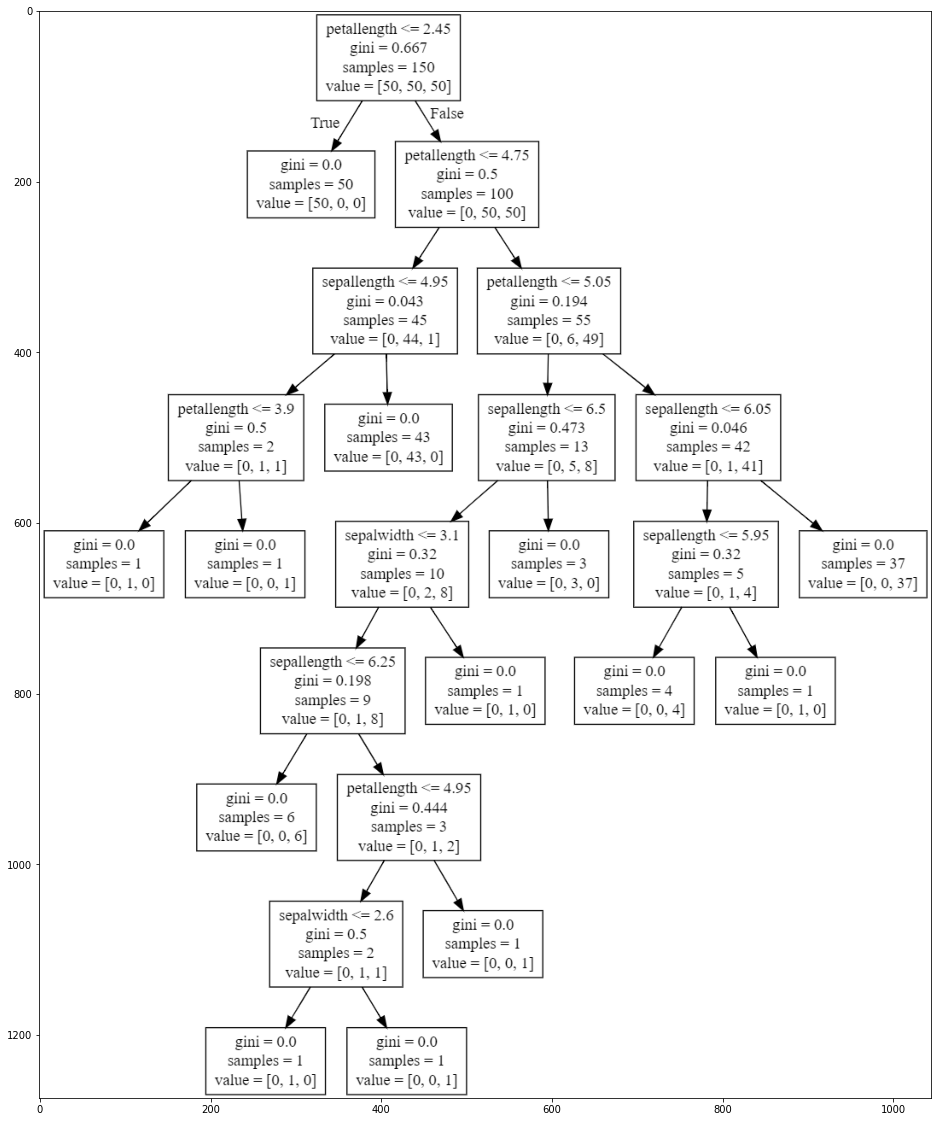

In [58]:
import matplotlib.pyplot as plot
import imageio
photo_data = imageio.imread("iris_1510.png")
plot.figure(figsize = (20, 20))
plot.imshow(photo_data)

In [59]:
import numpy as np
X_new = np.array([[4.7, 3.2, 1.3, 0.2],
                  [6.6, 3. , 4.4, 1.4],
                  [5.9, 3. , 5.1, 1.8]])

In [60]:
yhat_new = model.predict(X_new)
yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)